In [46]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Download latest version
path = kagglehub.dataset_download("ayeshaseherr/student-performance")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Eni-o\.cache\kagglehub\datasets\ayeshaseherr\student-performance\versions\1


In [48]:
data_path = r"C:\Users\Eni-o\.cache\kagglehub\datasets\ayeshaseherr\student-performance\versions\1"

# See what files are inside
print(os.listdir(data_path))

['StudentPerformanceFactors.csv']


In [49]:
# df_raw is your untouchable extracted data
df_raw = pd.read_csv(f"{data_path}/StudentPerformanceFactors.csv")

In [50]:
# df_spf is a copy of the original dataset where I'll do all my cleaning, processing etc 
df_spf = df_raw.copy()
display(df_spf.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [51]:
df_spf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Imputation

#### Filling in the missing values (and performing some ordinal enconding).

In [52]:
# Uses boolean to show columns with missing values.
df_spf.isnull().any()

Hours_Studied                 False
Attendance                    False
Parental_Involvement          False
Access_to_Resources           False
Extracurricular_Activities    False
Sleep_Hours                   False
Previous_Scores               False
Motivation_Level              False
Internet_Access               False
Tutoring_Sessions             False
Family_Income                 False
Teacher_Quality                True
School_Type                   False
Peer_Influence                False
Physical_Activity             False
Learning_Disabilities         False
Parental_Education_Level       True
Distance_from_Home             True
Gender                        False
Exam_Score                    False
dtype: bool

In [53]:
# shows the sum of rows that have no data in the Teacher_Quality column
display(df_spf['Teacher_Quality'].isna().sum())

# displays all the unique values in a column
display(df_spf['Teacher_Quality'].unique())

np.int64(78)

array(['Medium', 'High', 'Low', nan], dtype=object)

In [54]:
# Checks the mode
mode_value = df_spf['Teacher_Quality'].mode()[0]
print("Most frequent value:", mode_value)

Most frequent value: Medium


In [55]:
# Replace missing values
df_spf['Teacher_Quality'] = df_spf['Teacher_Quality'].fillna(mode_value)

# check to see if there are still missing values after change
display(df_spf['Teacher_Quality'].isna().sum())

np.int64(0)

In [56]:
# mapped each category to a numeric value
mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# used the mapping dictionary to change the Teacher_Quality data type
df_spf['Teacher_Quality'] = df_spf['Teacher_Quality'].map(mapping)

# checking the new data type
df_spf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   int64 
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [57]:
display(df_spf['Parental_Education_Level'].unique())

display(df_spf['Parental_Education_Level'].isna().sum())

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

np.int64(90)

In [58]:
mode_value = df_spf['Parental_Education_Level'].mode()[0]
print("Most frequent value:", mode_value)

Most frequent value: High School


In [59]:
df_spf['Parental_Education_Level'] = df_spf['Parental_Education_Level'].fillna(mode_value)

# check to see if there are still missing values after change
display(df_spf['Parental_Education_Level'].isna().sum())

np.int64(0)

In [60]:
df_spf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   int64 
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [61]:
display(df_spf['Distance_from_Home'].unique())

display(df_spf['Distance_from_Home'].isna().sum())

array(['Near', 'Moderate', 'Far', nan], dtype=object)

np.int64(67)

In [62]:
# Checks the mode
mode_value = df_spf['Distance_from_Home'].mode()[0]
print("Most frequent value:", mode_value)

Most frequent value: Near


In [63]:
# Replace missing values
df_spf['Distance_from_Home'] = df_spf['Distance_from_Home'].fillna(mode_value)

# check to see if there are still missing values after change
display(df_spf['Distance_from_Home'].isna().sum())

np.int64(0)

In [64]:
distance_mapping = {'Near': 1, 'Moderate': 2, 'Far': 3}

df_spf['Distance_from_Home'] = df_spf['Distance_from_Home'].map(distance_mapping)

df_spf.head(60)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,2,Public,Positive,3,No,High School,1,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,2,Public,Negative,4,No,College,2,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,2,Public,Neutral,4,No,Postgraduate,1,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,2,Public,Negative,4,No,High School,2,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,3,Public,Neutral,4,No,College,1,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,2,Public,Positive,3,No,Postgraduate,1,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,2,Private,Neutral,2,No,High School,2,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,3,Public,Negative,2,No,High School,3,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,1,Private,Neutral,1,No,College,1,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,3,Public,Positive,5,No,High School,2,Male,72


# Encoding

#### Changing data types, to make it more easier for analysis.

In [65]:
display(df_spf['Parental_Involvement'].unique())

# used mapping dictionary defined earlier to change data type
df_spf['Parental_Involvement'] = df_spf['Parental_Involvement'].map(mapping)

array(['Low', 'Medium', 'High'], dtype=object)

In [66]:
display(df_spf['Access_to_Resources'].unique())

# used mapping dictionary defined earlier to change data type
df_spf['Access_to_Resources'] = df_spf['Access_to_Resources'].map(mapping)

# checking the new data type
df_spf.tail(60)

array(['High', 'Medium', 'Low'], dtype=object)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6547,15,94,2,2,Yes,6,77,Low,Yes,3,High,3,Private,Neutral,4,No,College,1,Female,70
6548,22,75,3,2,No,7,52,High,Yes,0,Low,2,Private,Neutral,3,No,College,1,Female,66
6549,23,90,2,2,No,7,89,Low,Yes,2,High,2,Public,Positive,4,No,College,2,Female,71
6550,20,79,2,2,Yes,8,71,Medium,Yes,1,Medium,3,Public,Neutral,3,No,College,1,Female,68
6551,27,68,1,1,Yes,8,80,High,Yes,3,Medium,2,Public,Positive,4,Yes,High School,1,Male,66
6552,22,65,1,2,No,8,98,High,Yes,4,Medium,2,Private,Neutral,3,No,High School,1,Female,66
6553,16,74,1,3,No,8,76,Medium,Yes,5,Low,2,Public,Negative,3,No,College,2,Male,65
6554,18,66,2,2,Yes,7,90,Medium,Yes,0,Medium,2,Public,Negative,4,No,Postgraduate,1,Male,64
6555,12,100,1,2,Yes,7,65,Medium,Yes,1,Low,2,Private,Positive,2,No,High School,1,Male,67
6556,19,62,2,2,Yes,8,86,Low,Yes,1,High,2,Public,Positive,3,No,College,1,Male,65


In [67]:
display(df_spf['Extracurricular_Activities'].unique())

array(['No', 'Yes'], dtype=object)

##### **Boolean encoding** on columns with Yes and No values.

In [68]:
boolean_mapping = {'No': False, 'Yes': True}

df_spf['Extracurricular_Activities'] = df_spf['Extracurricular_Activities'].map(boolean_mapping)

display(df_spf['Extracurricular_Activities'].unique())


array([False,  True])

In [69]:
df_spf['Motivation_Level'] = df_spf['Motivation_Level'].map(mapping)
display(df_spf['Motivation_Level'].unique())

array([1, 2, 3])

In [70]:
df_spf['Family_Income'] = df_spf['Family_Income'].map(mapping)
display(df_spf['Family_Income'].unique())

array([1, 2, 3])

In [71]:
edu_mapping = {'High School': 1, 'College': 2, 'Postgraduate': 3}

df_spf['Parental_Education_Level'] = df_spf['Parental_Education_Level'].map(edu_mapping)
display(df_spf['Parental_Education_Level'].unique())

array([1, 2, 3])

In [72]:
peer_mapping = {'Negative': 1, 'Neutral': 2, 'Positive': 3}
df_spf['Peer_Influence'] = df_spf['Peer_Influence'].map(peer_mapping)
df_spf['School_Type'].unique()

array(['Public', 'Private'], dtype=object)

In [73]:
binary_mapping = {'No': 0, 'Yes': 1}
df_spf['Internet_Access'] = df_spf['Internet_Access'].map(binary_mapping)
df_spf['Internet_Access'].unique()

array([1, 0])

In [74]:
df_spf['Learning_Disabilities'] = df_spf['Learning_Disabilities'].map(binary_mapping)
display(df_spf['Learning_Disabilities'].unique())

array([0, 1])

In [75]:
school_mapping = {'Public': 0, 'Private': 1}
df_spf['School_Type'] = df_spf['School_Type'].map(school_mapping)
df_spf['School_Type'].unique()

array([0, 1])

In [76]:
gender_mapping = {'Male': 0, 'Female': 1}
df_spf['Gender'] = df_spf['Gender'].map(gender_mapping)
df_spf['School_Type'].unique()

array([0, 1])

In [77]:
# checking the new data type
df_spf.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,False,7,73,1,1,0,1,2,0,3,3,0,1,1,0,67
1,19,64,1,2,False,8,59,1,1,2,2,2,0,1,4,0,2,2,1,61
2,24,98,2,2,True,7,91,2,1,2,2,2,0,2,4,0,3,1,0,74
3,29,89,1,2,True,8,98,2,1,1,2,2,0,1,4,0,1,2,0,71
4,19,92,2,2,True,6,65,2,1,3,2,3,0,2,4,0,2,1,1,70
5,19,88,2,2,True,8,89,2,1,3,2,2,0,3,3,0,3,1,0,71
6,29,84,2,1,True,7,68,1,1,1,1,2,1,2,2,0,1,2,0,67
7,25,78,1,3,True,6,50,2,1,1,3,3,0,1,2,0,1,3,0,66
8,17,94,2,3,False,6,80,3,1,0,2,1,1,2,1,0,2,1,0,69
9,23,98,2,2,True,8,71,2,1,0,3,3,0,3,5,0,1,2,0,72


# Feature Engineering
#### Engineering features based on your dataset to aid in answering key research questions

In [78]:
# Create Resource Index
df_spf['Resource_Index'] = (
    df_spf['Family_Income'] +
    df_spf['Internet_Access'] +
    df_spf['Access_to_Resources']
)

# Create Effort Score
df_spf['Effort_Score'] = (
    df_spf['Hours_Studied'] +
    df_spf['Attendance'] +
    df_spf['Tutoring_Sessions']
)


# Create Challenge Index
df_spf['Challenge_Index'] = (
    df_spf['Distance_from_Home'] +
    (4 - df_spf['Parental_Involvement']) +
    df_spf['Learning_Disabilities']
)

df_spf[['Resource_Index', 'Effort_Score', 'Challenge_Index']].head(20)


,Resource_Index,Effort_Score,Challenge_Index
0,5,107,4
1,5,85,5
2,5,124,3
3,5,119,5
4,5,114,3
5,5,110,3
6,3,114,4
7,7,104,6
8,6,111,3
9,6,121,4


In [79]:
df_spf.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Resource_Index,Effort_Score,Challenge_Index
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,...,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,2.086423,2.100197,7.02906,75.070531,1.906463,0.924474,1.493719,1.787649,...,2.190858,2.967610,0.105191,1.696080,1.501589,0.422733,67.235659,4.812320,101.446496,3.520357
std,5.990594,11.547475,0.695521,0.698347,1.46812,14.399784,0.695798,0.264258,1.230570,0.742617,...,0.755876,1.031231,0.306823,0.778897,0.670260,0.494031,3.890456,1.049002,13.021959,1.015697
min,1.000000,60.000000,1.000000,1.000000,4.00000,50.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,55.000000,2.000000,63.000000,2.000000
25%,16.000000,70.000000,2.000000,2.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,65.000000,4.000000,91.000000,3.000000
50%,20.000000,80.000000,2.000000,2.000000,7.00000,75.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,3.000000,0.000000,1.000000,1.000000,0.000000,67.000000,5.000000,101.000000,3.000000
75%,24.000000,90.000000,3.000000,3.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,...,3.000000,4.000000,0.000000,2.000000,2.000000,1.000000,69.000000,6.000000,112.000000,4.000000
max,44.000000,100.000000,3.000000,3.000000,10.00000,100.000000,3.000000,1.000000,8.000000,3.000000,...,3.000000,6.000000,1.000000,3.000000,3.000000,1.000000,101.000000,7.000000,138.000000,7.000000


# ETL - Load
#### LOAD (Saving Your Cleaned Dataframe for Analysis)

In [80]:
# saving your fully cleaned + feature-engineered DataFrame into a processed dataset.
# Use a raw string (r'...') to prevent Python from misinterpreting backslashes (\)
spf_path = r'C:\Users\Eni-o\OneDrive\Desktop\Kanyin\CI_Data_Analytics_Bootcamp\Individual_Formative_Project_CI\Individual_Formative_Project\data\processed\student_performance_cleaned.csv'

# Save the file using the absolute path
df_spf.to_csv(spf_path, index=False)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Eni-o\\OneDrive\\Desktop\\Kanyin\\CI_Data_Analytics_Bootcamp\\Individual_Formative_Project_CI\\Individual_Formative_Project\\data\\processed\\student_performance_cleaned.csv'

# Data Analysis - Basic visualizations

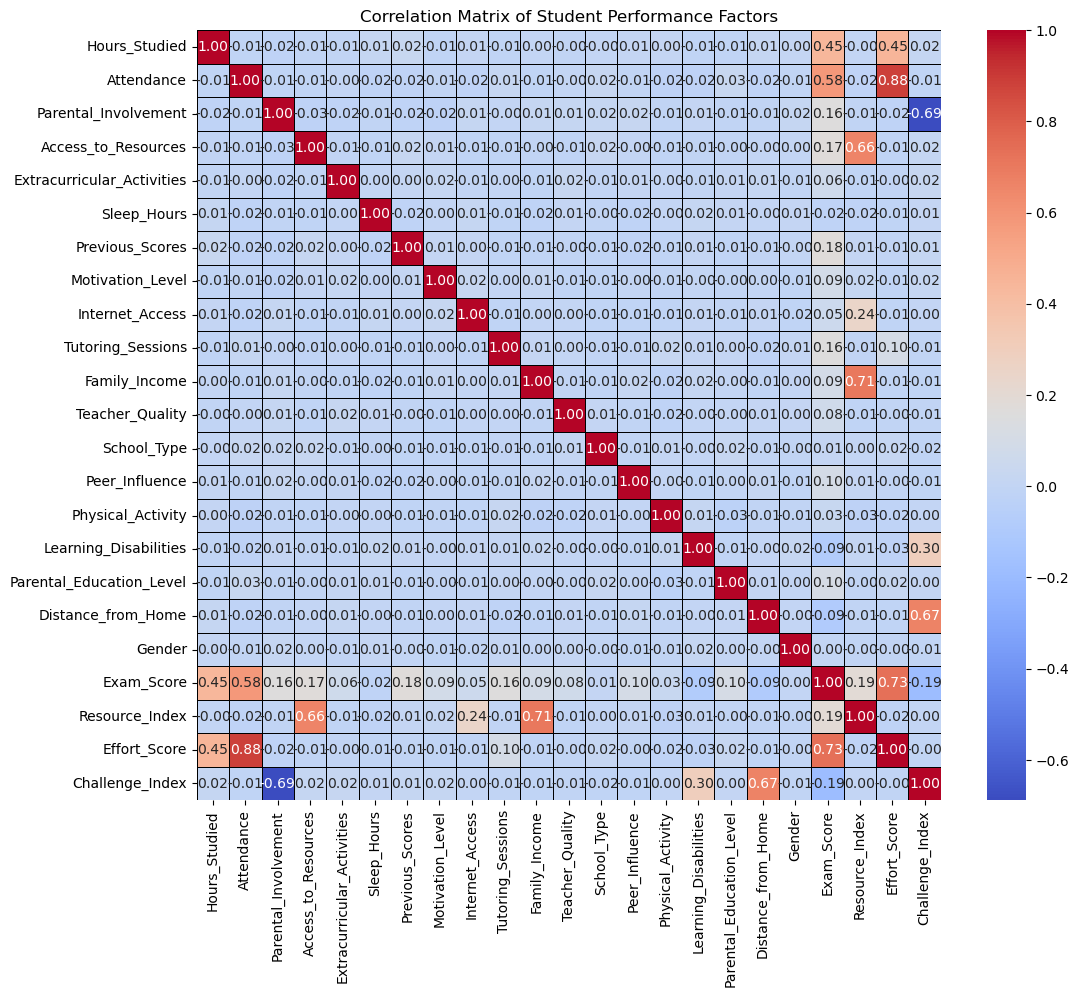

In [83]:
# Calculating the correlation matrix
correlation_matrix = df_spf.corr()

# Visualizing  the correlations using a Seaborn Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", # Shows two decimal places for correlation values
    linewidths=.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Student Performance Factors')
plt.show()

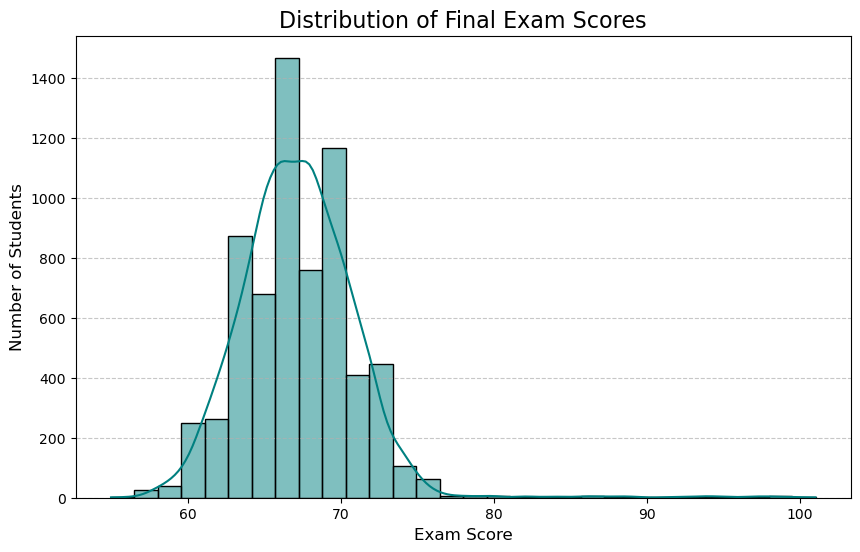

In [ ]:
plt.figure(figsize=(10, 6))
# Create a histogram with a smooth Density Plot (KDE) overlay
sns.histplot(
    data=df_spf, 
    x='Exam_Score', 
    kde=True, 
    bins=30, # Number of bars to show the data distribution
    color='teal'
)

# Customize the plot for clarity
plt.title('Distribution of Final Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('distribution_exam_scores.png')
plt.show()

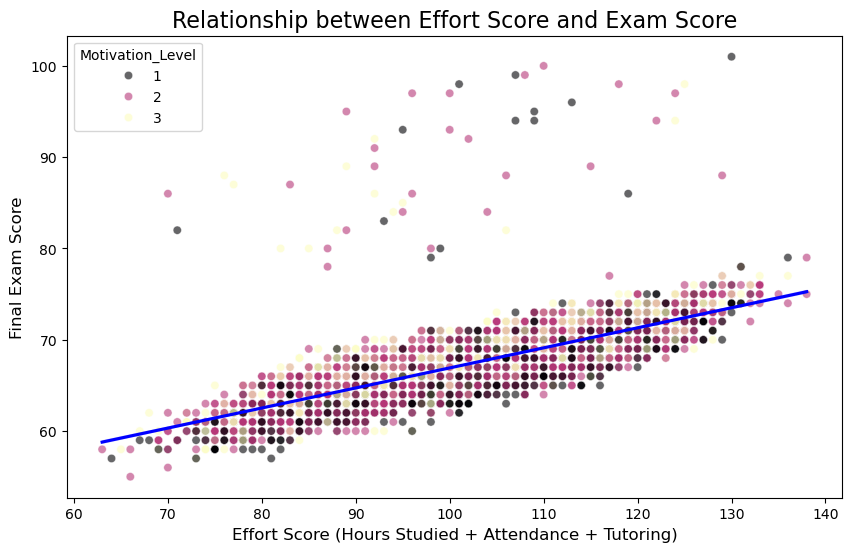

In [ ]:
plt.figure(figsize=(10, 6))
# Create a scatter plot to show the relationship and trend
sns.scatterplot(
    data=df_spf, 
    x='Effort_Score', 
    y='Exam_Score',
    hue='Motivation_Level', # Adding a hue to show a third variable's impact
    palette='magma', 
    alpha=0.6
)

# Add a trend line to illustrate the positive correlation
sns.regplot(
    data=df_spf, 
    x='Effort_Score', 
    y='Exam_Score', 
    scatter=False, 
    color='blue'
)

plt.title('Relationship between Effort Score and Exam Score', fontsize=16)
plt.xlabel('Effort Score (Hours Studied + Attendance + Tutoring)', fontsize=12)
plt.ylabel('Final Exam Score', fontsize=12)
plt.show()

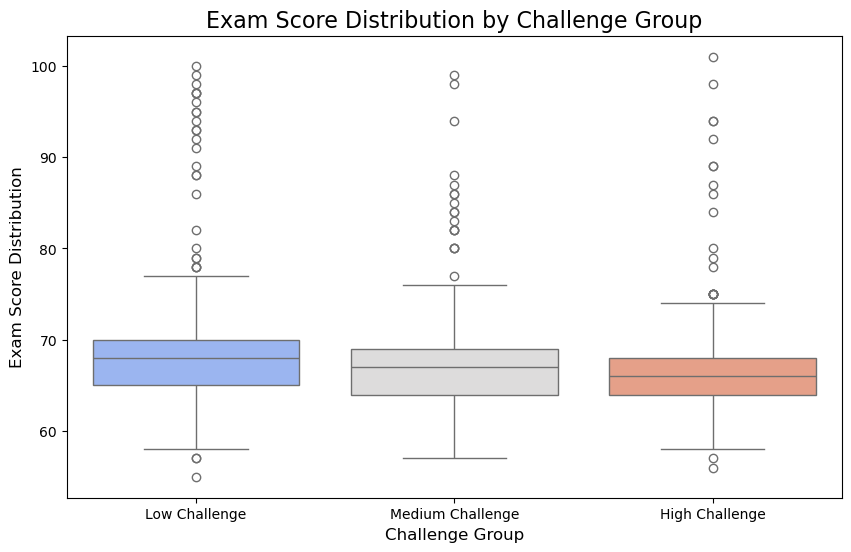

In [84]:
# # Create a Categorical Challenge Group (necessary for the plot)
df_spf['Challenge_Group'] = pd.qcut(
    df_spf['Challenge_Index'], 
    q=3, # Group the data into three equal parts (tertiles)
    labels=['Low Challenge', 'Medium Challenge', 'High Challenge']
)

plt.figure(figsize=(10, 6))

# CORRECTED CODE: Assign x to hue and set legend=False
sns.boxplot(
    data=df_spf,
    x='Challenge_Group',
    y='Exam_Score',
    hue='Challenge_Group',  # Explicitly set the hue to the x-variable
    palette='coolwarm',
    legend=False            # Suppress the redundant legend
)

plt.title('Exam Score Distribution by Challenge Group', fontsize=16)
plt.xlabel('Challenge Group', fontsize=12)
plt.ylabel('Exam Score Distribution', fontsize=12)
plt.show()

# NOTE: Run the line below, to drop temporary column
# df_spf.drop(columns=['Challenge_Group'], inplace=True)